# Google Playstore Case Study

**Problem Statement**

The team at Google Play Store wants to develop a feature that would enable them to boost visibility for the most promising apps.Promising apps are promoted in the recommendation sections-'Similiar apps','You might also like','New and updated apps'..etc. Primary Strategy- Identify what factors make an app do well-is it the size, category, price and so on.
In this analysis questions like mentioned below will be answered:
- Does a higher size or price necessarily mean that an app would perform better than the other apps? 
- Or does a higher number of installs give a clear picture of which app would have a better rating than others?


In [314]:
import pandas as pd
import numpy as np

In [315]:
df= pd.read_csv("googleplaystore_v2.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [316]:
df.shape

(10841, 13)

### Data Handling and Cleaning

Firstly,lets make sure that there are no missing values or incorrect data types
 

In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


#### Missing Value Treatment

In [318]:
#Checking the number of null values in the columns
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

 - Ratings is the target variable.So, lets drop the records in which rating column is missing

In [319]:
#Droping the rows having null values in the Rating field
df1 = df[~df['Rating'].isnull()]

In [320]:
# Checking the number of nulls in the Rating field again to cross-verify
df1.Rating.isnull().sum()

0

In [321]:
df1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [322]:
#Inspecting the nulls in the Android Version column
df1[df1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [323]:
#Droping the row having shifted values
df1 = df1[~(df1['Android Ver'].isnull() & (df1.Category == "1.9"))]
df1[df1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [324]:
# Everything is fine with records having missing values in current ver column
df1[df1['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


Imputing Missing Values

In [325]:
df1['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
1.0 and up               2
5.0 - 8.0                2
4.0.3 - 7.1.1            2
5.0 - 6.0                1
4.1 - 7.1.1              1
7.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [326]:
#Filling up the nulls in the Android Version column with the mode as it is categorical variable
df1['Android Ver'] = df1['Android Ver'].fillna(df1['Android Ver'].mode()[0])

In [327]:
#Checking the most common value in the Current version column
df1['Current Ver'].value_counts()

Varies with device        1415
1.0                        458
1.1                        195
1.2                        126
1.3                        120
                          ... 
5.0.1.11068-production       1
8.9.1                        1
8.8.14                       1
1.0.51.0.3                   1
2.164.4                      1
Name: Current Ver, Length: 2638, dtype: int64

In [328]:
#Replacing the nulls in the Current version column with the mode  as it is categorical variable
df1['Current Ver'] = df1['Current Ver'].fillna(df1['Current Ver'].mode()[0])

#### Handling Incorrect Data Types 

In [329]:
# Some columns have incorrect datatypes like Price,Reviews,Installs
df1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [330]:
df1.Price.value_counts()

0         8719
$2.99      114
$0.99      107
$4.99       70
$1.99       59
          ... 
$2.90        1
$39.99       1
$4.29        1
$15.46       1
$15.99       1
Name: Price, Length: 73, dtype: int64

In [331]:
#Applying function to get rid of the dollar symbol
df1.Price = df1.Price.apply(lambda x: 0 if x=="0" else float(x[1:]))

#Changing the dtype of this reviews column
df1.Reviews = df1.Reviews.astype("int32")

In [332]:
df1.Installs.head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [333]:
#Applying function to get rid of the plus symbol
def clean_installs(val):
    return int(val.replace(",","").replace("+",""))
df1.Installs = df1.Installs.apply(clean_installs)

#### Sanity Checks

The data that we have needs to make sense and therefore we perform certain sanity checks on them to ensure they are factually correct. Some sanity checks are:

- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldn’t have a price greater than 0.


In [334]:
#Performing the sanity checks on the Reviews column
df1[(df1.Reviews > df1.Installs)].shape

(7, 13)

In [335]:
# The max and min ratings are within the accepted range
df1['Rating'].describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [336]:
df['Rating']

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    NaN
10839    4.5
10840    4.5
Name: Rating, Length: 10841, dtype: float64

In [337]:
# 7 records have reviews greater than installs, it is better to delete these records in order to perform error-free analysis 
df1[(df1.Reviews > df1.Installs)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [338]:
# Filtering for records which staisfy the reviews condition 
df1 = df1[df1.Reviews <= df1.Installs]

In [339]:
#sanity checks on prices of free apps 
df1[(df1.Type == "Free") & (df1.Price>0)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [340]:
import matplotlib.pyplot as plt
%matplotlib inline

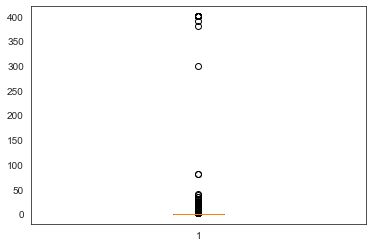

In [341]:
#box plot for the price column
# Some apps have very high prices that is above 150$
plt.boxplot(df1.Price)
plt.show()

In [342]:
#Checking the apps with price more than 200
# We can see many apps with suspicious names such as 'I am Rich','I am rich(premium)'..etc
# These apps can be classified as junk apps
df1[df1.Price > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [343]:
# Deleting the junk apps
df1 = df1[df1.Price < 200]

In [344]:
# We can see that many apps are free as 75th percentile is 0
# lets have a look at the paid apps in detail with boxplot
df1.Price.describe()

count    9344.000000
mean        0.334463
std         2.169925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

<AxesSubplot:>

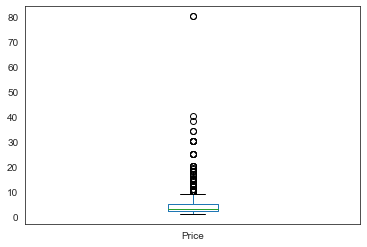

In [345]:
#box plot for paid apps
#The prices are continuous till around 25 or 30 dollars and after that we can see very few apps
df1[df1.Price>0].Price.plot.box()

In [346]:
#Checking the apps with price more than 30
#There is a suspicious app with name'I am Rich Person' and there are duplicate
# records for 'A Manual of Acupuncture','Vargo Anesthesia Mega App' apps
df1[df1.Price>30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [347]:
#Cleaning the Price column further
df1 = df1[df1.Price <= 30]
df1.shape

(9338, 13)

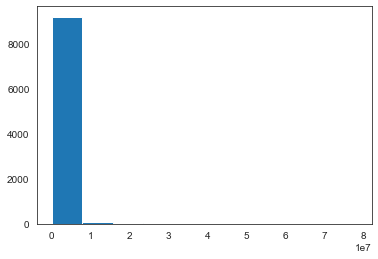

In [348]:
#Histogram of the Reviews column
plt.hist(df1.Reviews)
plt.show()

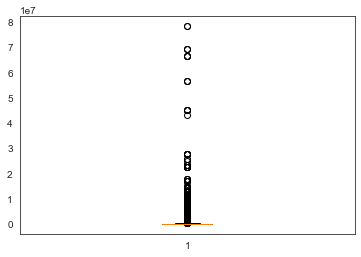

In [349]:
#Boxplot of the Reviews column
#From the histogram and boxplot plot it is seen that majority of the apps have reviews within 1million
plt.boxplot(df1.Reviews)
plt.show()

In [350]:
# Records with 1 million reviews
# The records are extremely popular apps like whatsapp,facebook and some of them are preinstalled, but in our study
# we are focusing on apps which can be promising. So, we drop these records.
df1[df1.Reviews >= 10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,21516.529524,500000000,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.000000,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,BBM - Free Calls & Messages,COMMUNICATION,4.3,12843436,21516.529524,100000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,4.0.3 and up
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,21516.529524,500000000,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
7937,Shadow Fight 2,GAME,4.6,10981850,88000.000000,100000000,Free,0.0,Everyone 10+,Action,"July 2, 2018",1.9.38,3.0 and up
8894,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759815,15000.000000,100000000,Free,0.0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up


In [351]:
#Drop the above records
df1 = df1[df1.Reviews <= 1000000]
df1.shape

(8634, 13)

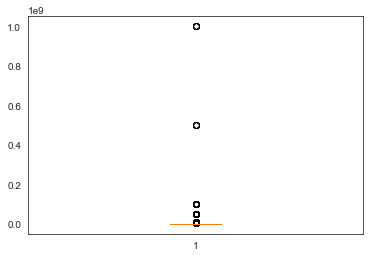

In [352]:
plt.boxplot(df1.Installs)
plt.show()

In [353]:
#Removing all the apps having more than or equal to 100 million installs, as they also are very prevalently used
df1 = df1[df1.Installs <= 100000000]

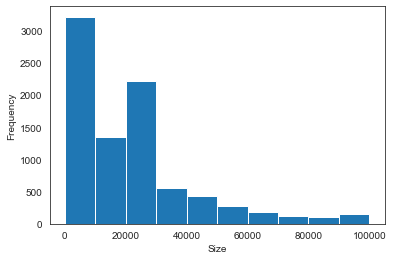

In [354]:
#histogram for Size 
df1.Size.plot.hist()
plt.xlabel('Size')
plt.show()

  * It is clearly visible that the first three peaks outweigh the rest of the bars
  * Hence majority of apps have a size less than 30,000.

In [355]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

In [356]:
#Analyse the Content Rating column
# As last two categories i.e 'Adults only 18+','Unrated' have very few records lets drop them
df1['Content Rating'].value_counts()

Everyone           6938
Teen                928
Mature 17+          417
Everyone 10+        337
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [357]:
#Removing the rows with values which are less represented
df1 = df1[~df1['Content Rating'].isin(["Adults only 18+","Unrated"])]

In [358]:
#Reset the index so that the index has continuous values
df1.reset_index(inplace=True, drop=True)

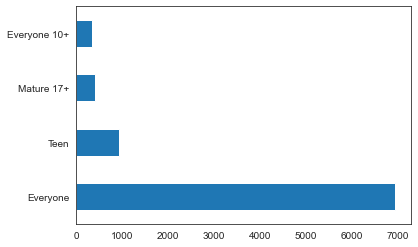

In [359]:
#bar plot for Content Rating
df1['Content Rating'].value_counts().plot.barh()
plt.show()

#### Scatter Plots

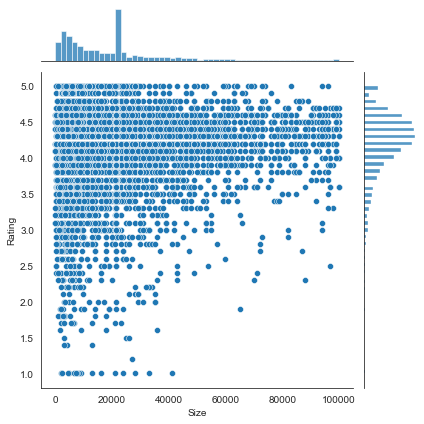

In [360]:
sns.set_style("white")
sns.jointplot(df1.Size, df1.Rating)
plt.show()

*  We can see that heavier apps tend to have better rating as most of them have rating above 3
* The reason behind might be that heavier apps are typically built by established product based companies 
* so they have better functionalities and are highly rated.
* This trend is not very strong, but in general we can say that heavier apps tend to have better rating compared to the other apps

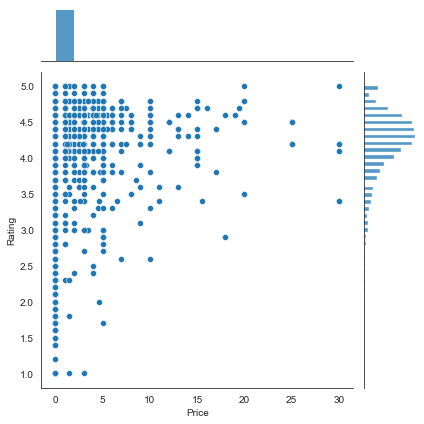

In [361]:
#jointplot for Price and Rating
sns.jointplot(df1.Price, df1.Rating)
plt.show()




* On higher side of the price there seems to be very few apps which have low rating,
* whereas on the lower side there are apps with all kinds of rating i.e from high to low

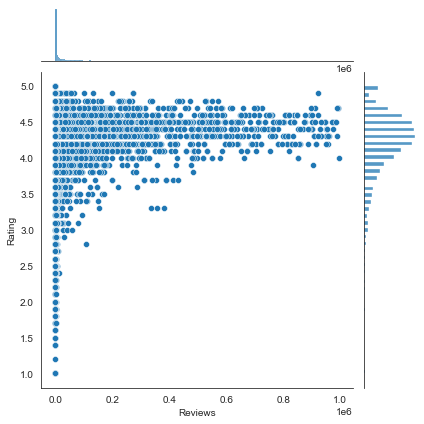

In [362]:
#jointplot for Reviews and Rating
sns.jointplot(df1.Reviews,df1.Rating)
plt.show()

* As the number of reviews increases the rating have gone up simultaneously,
* The apps with higher number of reviews are popular and user liked, as people tend to write a review incase if they like the app
* Whereas very few people care to write a bad review incase if they dont like the app, others just leave or uninstall the app

<AxesSubplot:xlabel='Content Rating'>

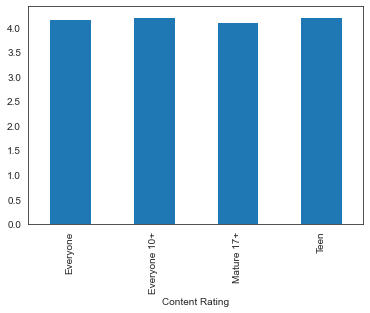

In [363]:
# bar plot of Content Rating vs Average Rating 
df1.groupby(['Content Rating'])['Rating'].mean().plot.bar()

* The above bars representing the average rating across content rating categories seems to be same hovering around just above 4
* This happend because many of the apps have rating in the range 4 to 4.5

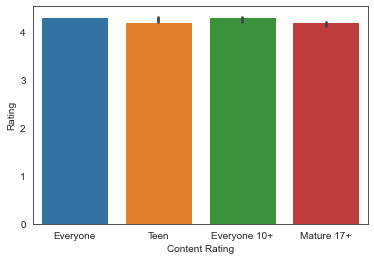

In [364]:
## bar plot of Content Rating vs Median Rating 
sns.barplot(data=df1, x="Content Rating", y="Rating", estimator=np.median)
plt.show()

We can see the same result as above, it is very difficult to draw insights from these graphs. So, its better to consider the 5 percentile or the 10 percetile to get a clear picture

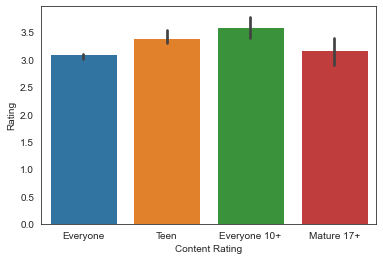

In [365]:
#bar plot with only the 5th percentile of Ratings
sns.barplot(data=df1, x="Content Rating", y="Rating", estimator=lambda x: np.quantile(x,0.05))
plt.show()

From the above graph it is clear that 'Everyone 10+' category is doing well in lower end, with better ratings compared to other groups

Box Plots 



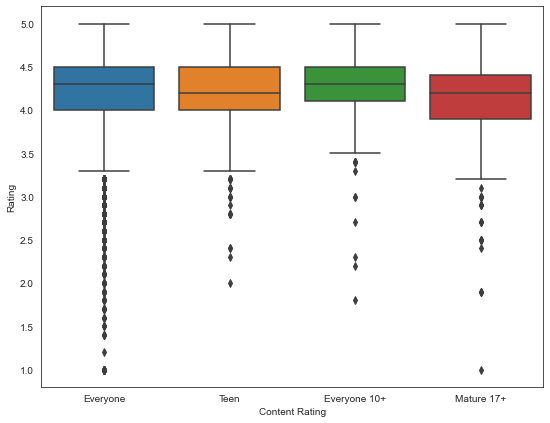

In [366]:
#box plot of Rating vs Content Rating
plt.figure(figsize=[9,7])
sns.boxplot(df1['Content Rating'], df1.Rating)
plt.show()

* 'Everyone 10+' category has highest median value, but there not much variation of this compared to other groups
* The presence of lowest rating values are minimal in 'Teen','Everyone 10+' groups(lowest is around 1.7) , compared to the rest two groups ( lowest around 1)
* The upper fences for all the categories get capped at 5.0

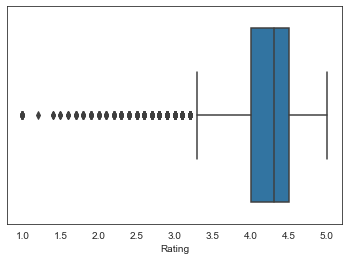

In [367]:
#box plot for the Rating column
sns.boxplot(df1.Rating)
plt.show()

* In general, 50 percent of the apps have rating between 4 and 4.5
* 25% of the apps have rating above 4.5

In [368]:
df1['Genres'].value_counts()

Tools                                694
Entertainment                        508
Education                            464
Medical                              344
Finance                              315
                                    ... 
Comics;Creativity                      1
Travel & Local;Action & Adventure      1
Strategy;Creativity                    1
Health & Fitness;Education             1
Communication;Creativity               1
Name: Genres, Length: 115, dtype: int64

<AxesSubplot:xlabel='Genres', ylabel='Rating'>

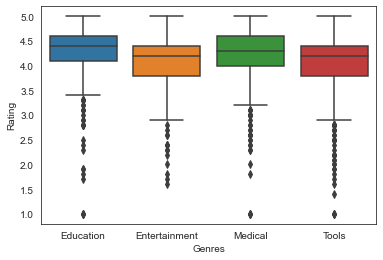

In [369]:
## Box plot of Ratings across the 4 most popular Genres
c = ['Tools','Entertainment','Medical','Education']
df5= df1[df1['Genres'].isin(c)]
sns.boxplot(df5['Genres'],df5.Rating)

* Education apps have better rating compared to other apps, with more than 75% of them being rated above 4
* Next comes Medical related apps, follwed by the rest two. 
* Interestingly, Entertainment and Tools have similiar kind of distribution

#### Heat Maps

In [370]:
##Ratings vs Size vs Content Rating
#buckets are created for the Size column based on the percentile values and records are classified 
#into 5 different groups based on their percentile values.
df1['Size_Bucket'] = pd.qcut(df1.Size, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL","L","M","H","VH"])

In [371]:
# pivot table for Size_buckets and Content Rating with values set to Rating
pd.pivot_table(data=df1, index="Content Rating", columns="Size_Bucket", values="Rating")

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.117536,4.158405,4.215784,4.170799,4.187302
Everyone 10+,4.189474,4.207407,4.238318,4.193443,4.217073
Mature 17+,3.978947,4.124211,4.021705,4.155172,4.193814
Teen,4.184848,4.233094,4.143310,4.198131,4.246154


* The above table represents the average rating across different Content Rating and Size combinations.
* It is very difficult to interpret as the values are very close to each other. So, lets consider some lower percentile instead of mean for better understanding of the data.

In [372]:
##Changing the aggregation to 20th percentile
res = pd.pivot_table(data=df1,index="Content Rating",columns="Size_Bucket",values="Rating",aggfunc=lambda x: np.quantile(x,0.20))
res

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,3.80,3.80,4.0,3.8,3.9
Everyone 10+,3.86,3.92,4.1,4.0,4.0
Mature 17+,3.30,3.68,3.7,3.9,4.0
Teen,3.80,3.90,3.9,4.0,4.0


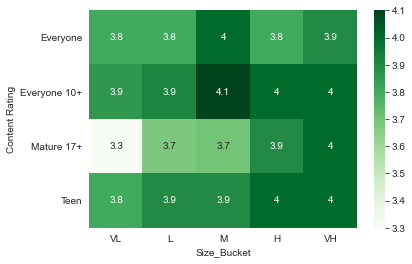

In [373]:
##Apply customisations
sns.heatmap(res, cmap = "Greens", annot=True)
plt.show()

* By comapring the 20 percentile values,it is seen that medium to heavier apps have better average rating. So people are prefering apps that are moderate to heavier size with many utilities.
* Everyone 10+ category has higher rating across different size buckets
* 'Mature 17+' apps with very low size had the least average rating

In [374]:
df1['Size_Bucket'] = pd.qcut(df1.Size, [0, 0.2, 0.4, 0.6, 0.8, 1], ["VL","L","M","H","VH"])

#### Line Plots

In [375]:
## Extracting the month from the Last Updated Date
df1['updated_month'] = pd.to_datetime(df1['Last Updated']).dt.month

In [376]:
## average Rating across all the months
df1.groupby(['updated_month'])['Rating'].mean()

updated_month
1     4.143842
2     4.090385
3     4.107963
4     4.148326
5     4.153375
6     4.172590
7     4.222968
8     4.271086
9     4.041406
10    4.012739
11    4.102685
12    4.065350
Name: Rating, dtype: float64

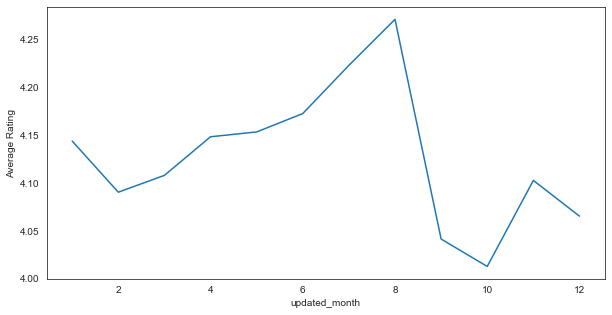

In [377]:
plt.figure(figsize=[10,5])
df1.groupby(['updated_month'])['Rating'].mean().plot()
plt.ylabel('Average Rating')
plt.show()

* The averating ratings are highest in the middle of the year
* Apps released in the months june to august have slightly higher average rating

#### Stacked Bar Charts

In [378]:
#pivot table for Content Rating and updated Month with the values set to Installs
monthly = pd.pivot_table(data=df1, values="Installs", index="updated_month", columns="Content Rating", aggfunc=sum)
monthly

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
updated_month,,,,
1,925387390,105282000,9701210,44159010
2,545372005,19821000,13021500,39597710
3,695365520,30322510,9111100,79850310
4,973371180,23300000,5259000,161619410
5,1861067800,118173500,50140100,202689600
6,2427170505,317727100,145257200,415716600
7,7771109680,456556000,419491910,1943556800
8,5930943320,215821000,312981700,1257855650
9,260340410,24931100,2201010,22483100


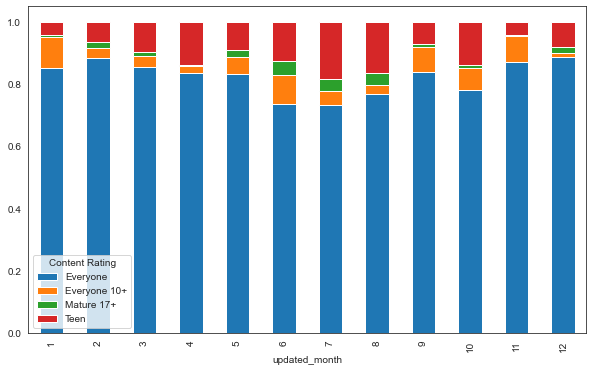

In [379]:
##Plotting the stacked bar chart wrt to the proportions of the respected month
monthly_perc = monthly[["Everyone","Everyone 10+","Mature 17+","Teen"]].apply(lambda x: x/x.sum(), axis=1)
monthly_perc.plot(kind="bar", stacked="True", figsize=[10,6])
plt.show()

* In months 6,7,8 the proportions of teen app installations is higher compared to other months. 

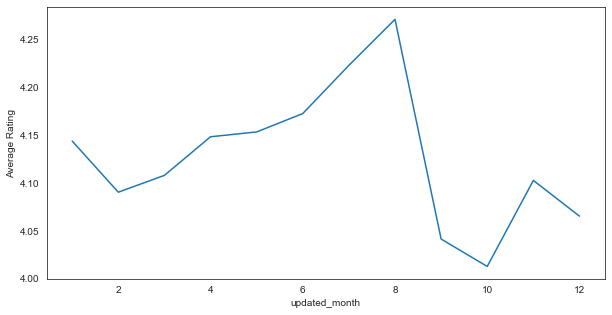

In [381]:
plt.figure(figsize=[10,5])
df1.groupby(['updated_month'])['Rating'].mean().plot()
plt.ylabel('Average Rating')
plt.show()

* Also if closely observed the average rating is also high in the 6,7,8 months.The reason behind this pattern may be because of the summer break, as many schools have summer holidays between may starting and end of august. This is the time where teenagers have plenty of free time, so we can expect many installs and at the same time they give a high rating to the apps, which inturn increases the average rating of that month.